In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

df = pd.read_csv('ckd-dataset-v2.csv')
df.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
1,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
2,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
3,1,1,1.009 - 1.011,3 - 3,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
4,0,0,1.015 - 1.017,< 0,ckd,0,< 0,0,0,0,...,0,1,0,1,1,0,127.281 - 152.446,s1,1,12 - 20


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bp (Diastolic)  200 non-null    int64 
 1   bp limit        200 non-null    int64 
 2   sg              200 non-null    object
 3   al              200 non-null    object
 4   class           200 non-null    object
 5   rbc             200 non-null    int64 
 6   su              200 non-null    object
 7   pc              200 non-null    int64 
 8   pcc             200 non-null    int64 
 9   ba              200 non-null    int64 
 10  bgr             200 non-null    object
 11  bu              200 non-null    object
 12  sod             200 non-null    object
 13  sc              200 non-null    object
 14  pot             200 non-null    object
 15  hemo            200 non-null    object
 16  pcv             200 non-null    object
 17  rbcc            200 non-null    object
 18  wbcc      

In [11]:
df.isnull().sum()

bp (Diastolic)    0
bp limit          0
sg                0
al                0
class             0
rbc               0
su                0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sod               0
sc                0
pot               0
hemo              0
pcv               0
rbcc              0
wbcc              0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
grf               0
stage             0
affected          0
age               0
dtype: int64

In [12]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols.remove('class')

In [13]:
df[cat_cols].nunique()

sg        5
al        5
su        6
bgr      10
bu        8
sod       9
sc        7
pot       4
hemo     10
pcv      10
rbcc      9
wbcc      9
grf      11
stage     5
age      10
dtype: int64

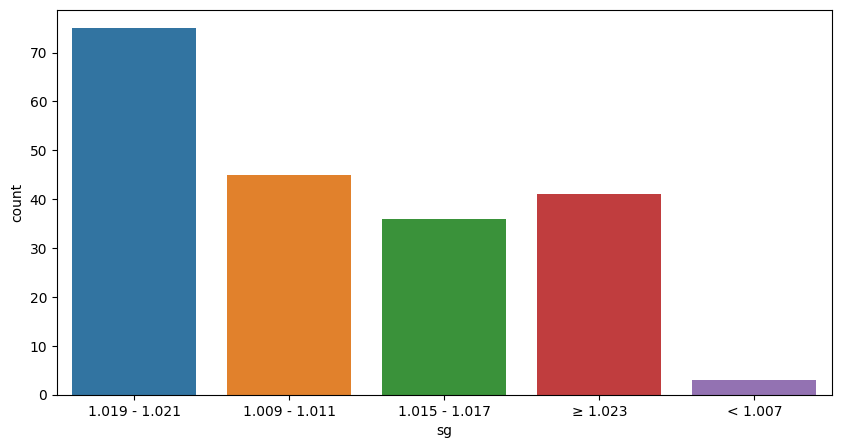

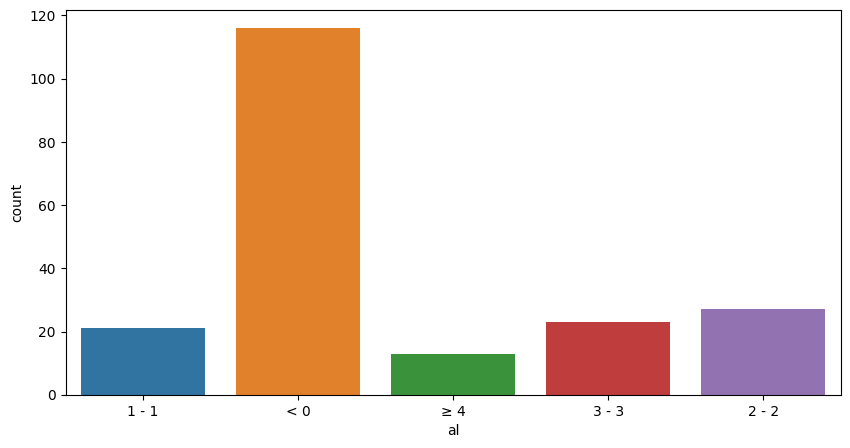

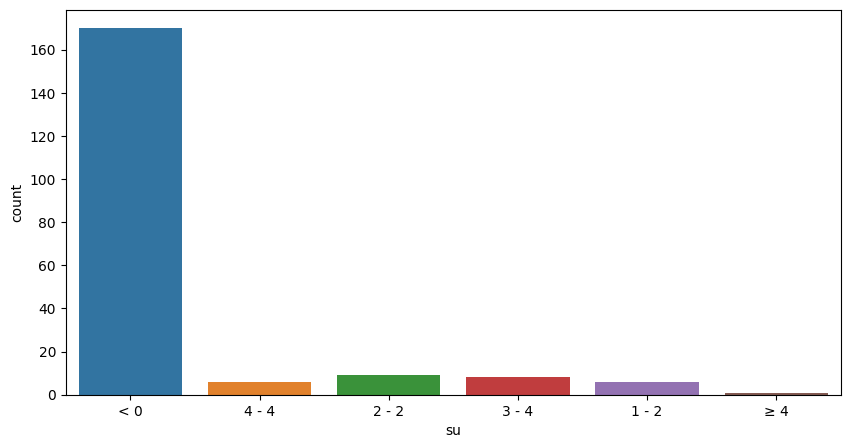

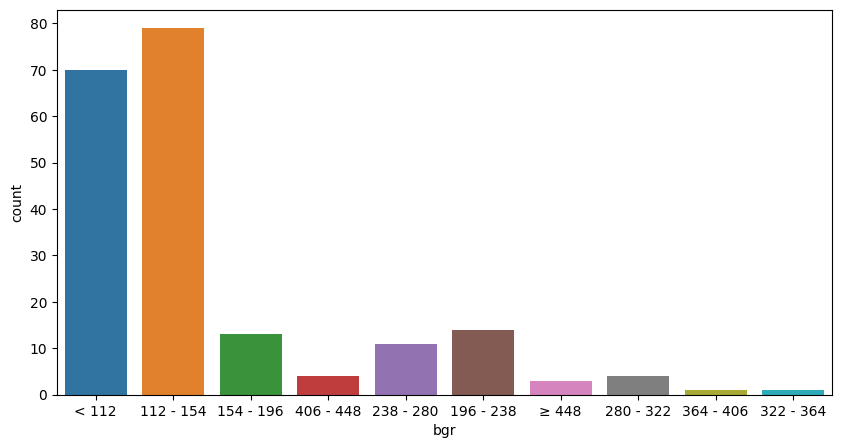

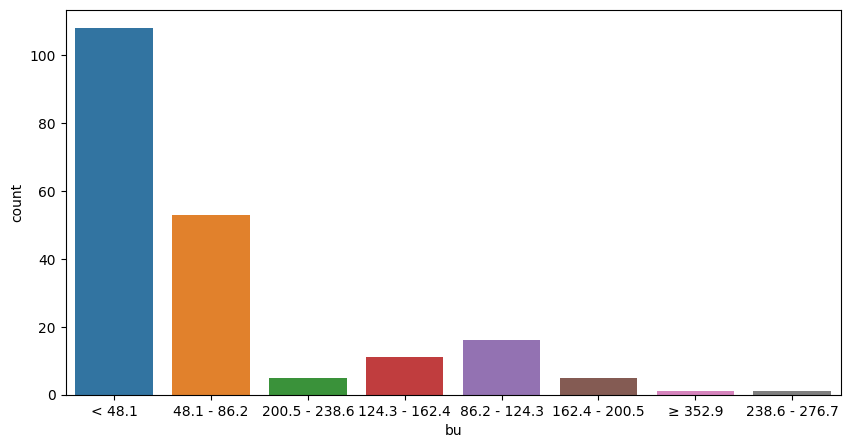

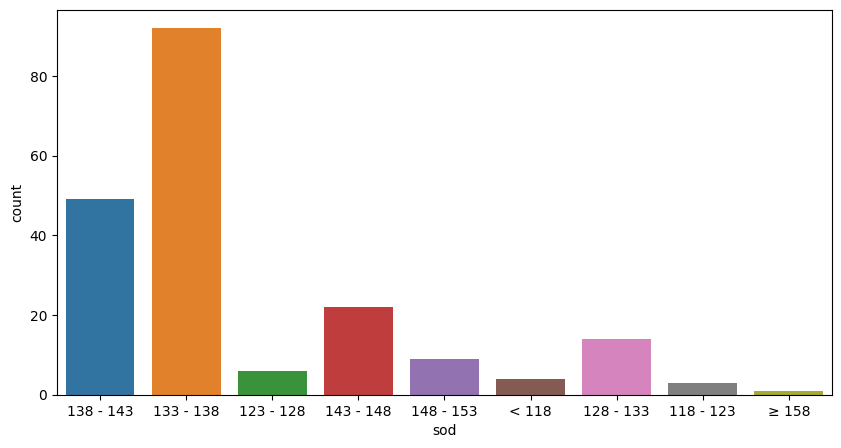

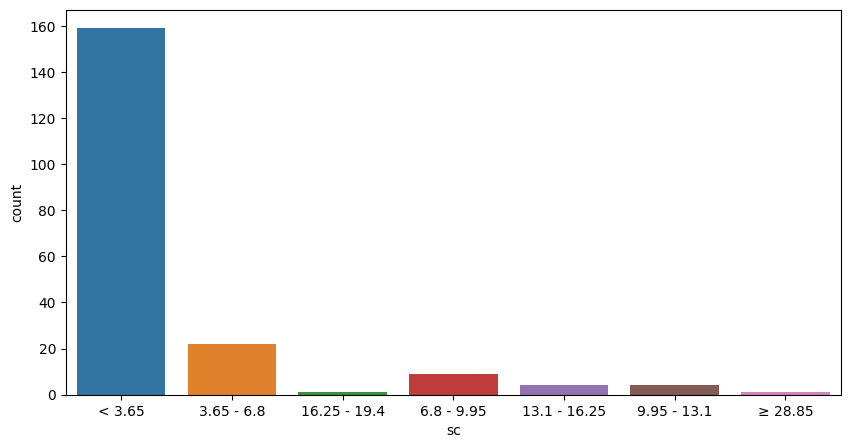

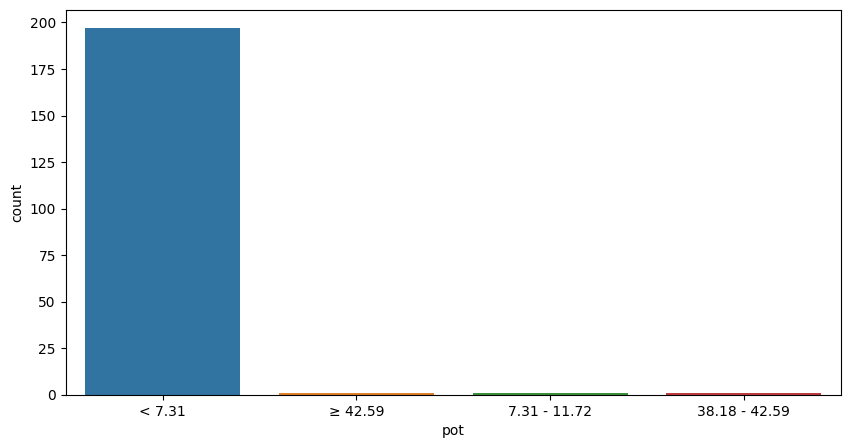

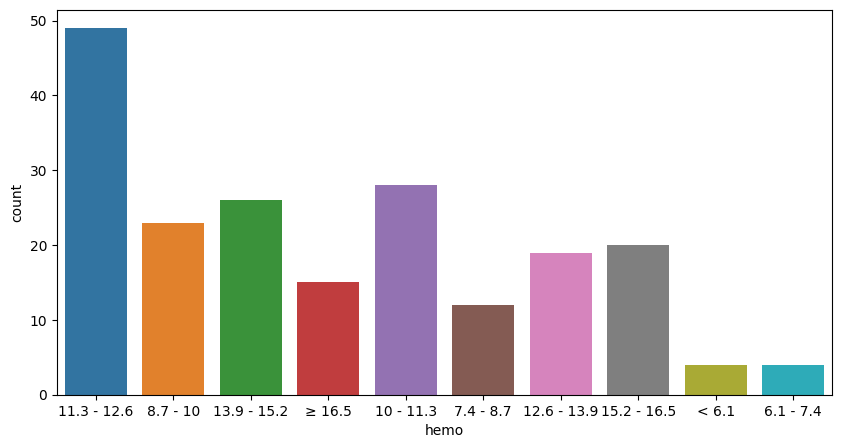

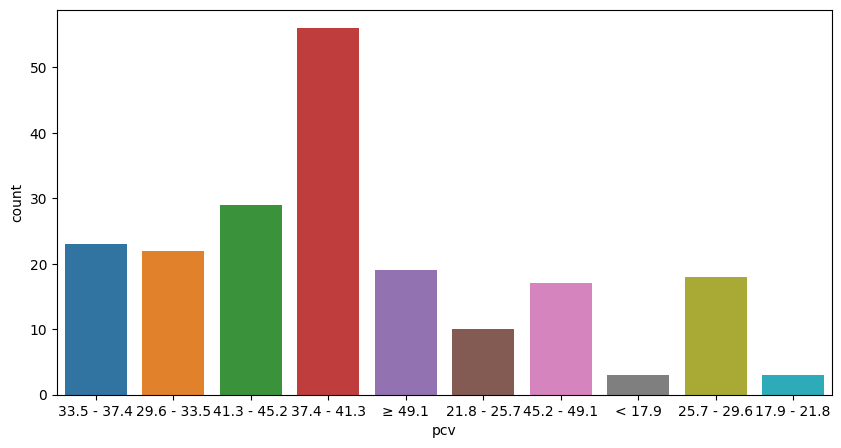

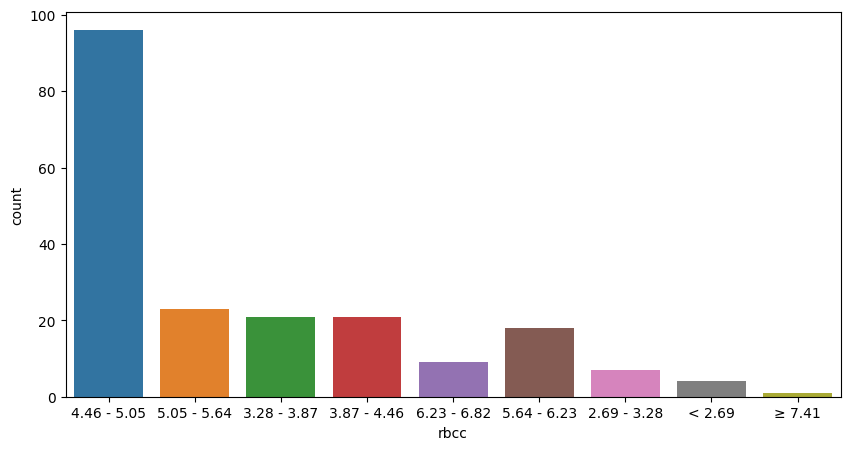

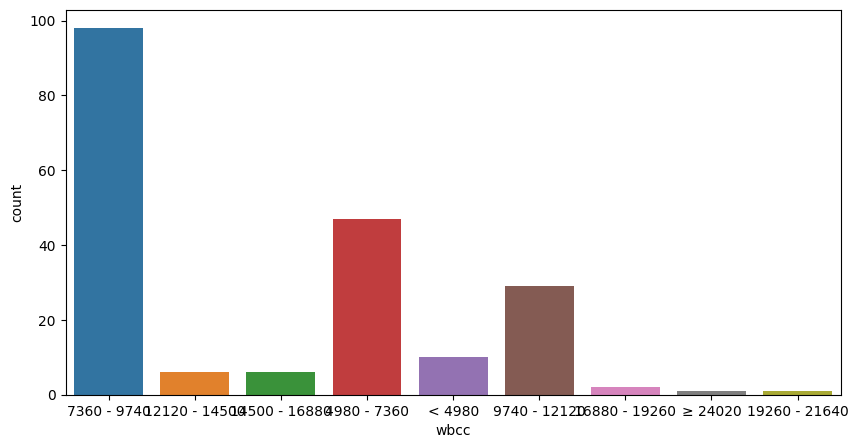

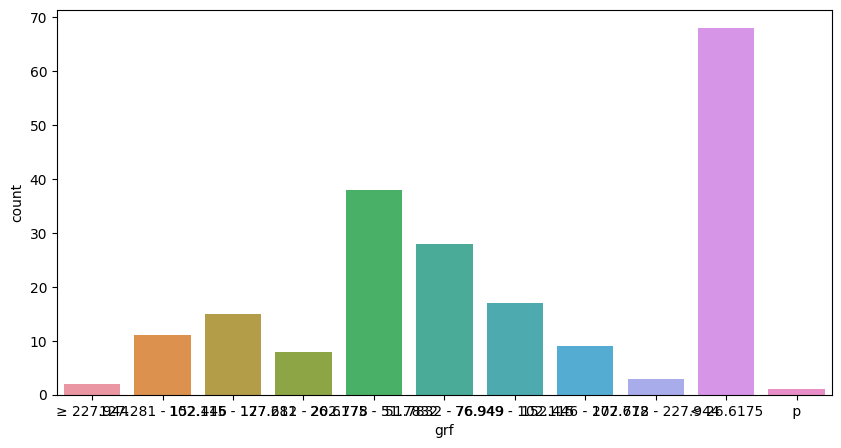

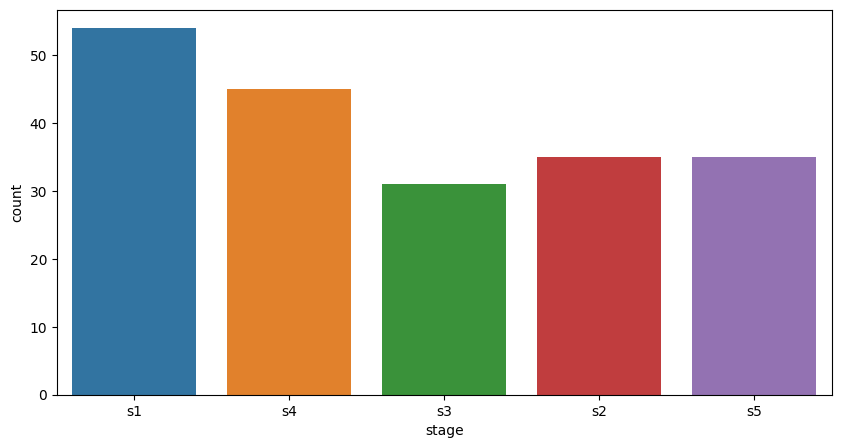

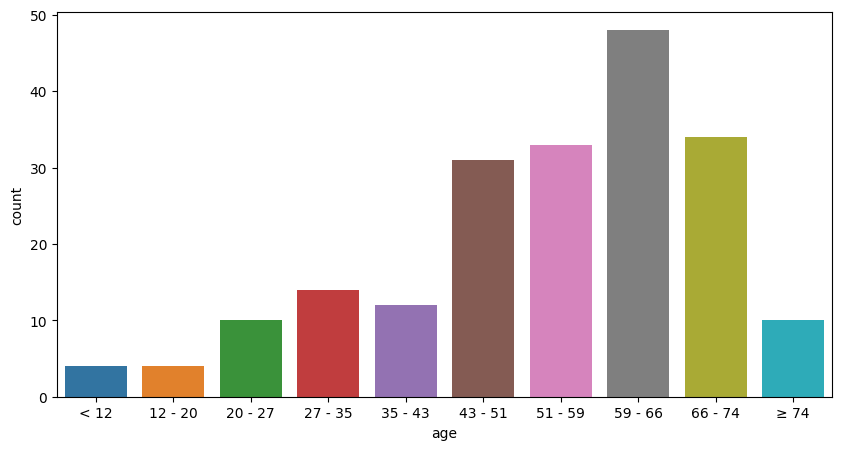

In [15]:
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(df, x=col)
    plt.show()

In [16]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
bp (Diastolic),200.0,0.540,0.499648,0.0,0.0,1.0,1.0,1.0
bp limit,200.0,0.755,0.805119,0.0,0.0,1.0,1.0,2.0
rbc,200.0,0.125,0.331549,0.0,0.0,0.0,0.0,1.0
pc,200.0,0.225,0.418630,0.0,0.0,0.0,0.0,1.0
pcc,200.0,0.135,0.342581,0.0,0.0,0.0,0.0,1.0
ba,200.0,0.055,0.228552,0.0,0.0,0.0,0.0,1.0
htn,200.0,0.390,0.488974,0.0,0.0,0.0,1.0,1.0
dm,200.0,0.350,0.478167,0.0,0.0,0.0,1.0,1.0
cad,200.0,0.110,0.313675,0.0,0.0,0.0,0.0,1.0
appet,200.0,0.200,0.401004,0.0,0.0,0.0,0.0,1.0


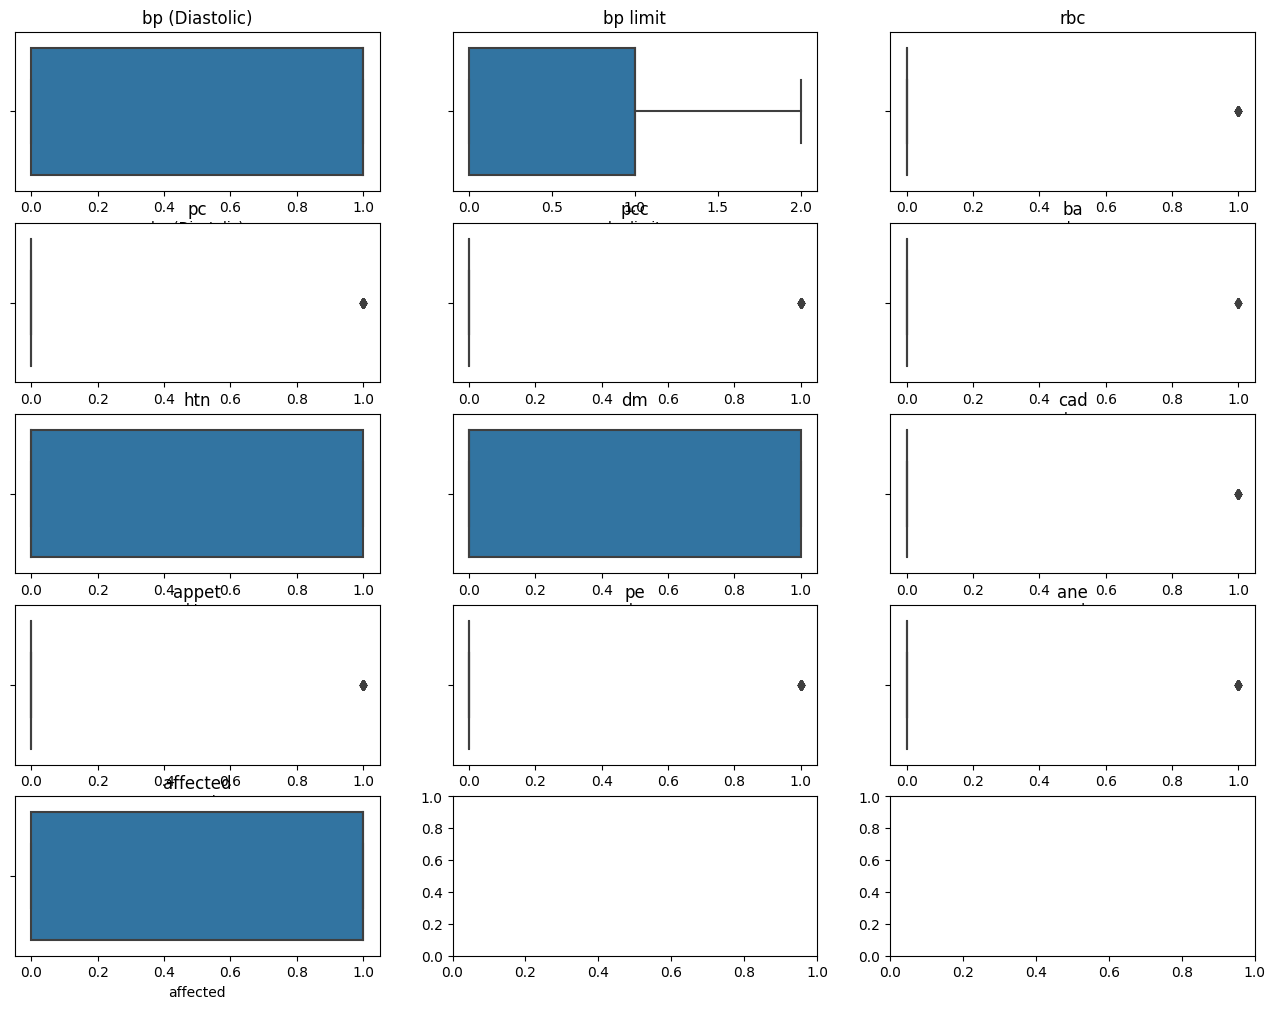

In [22]:
fig, axs = plt.subplots(math.ceil(len(num_cols) / 3), 3, figsize=(16, 12))
axs = axs.flat

for i, col in enumerate(num_cols):
    sns.boxplot(df, x=col, ax=axs[i])
    axs[i].set_title(col)
plt.show()

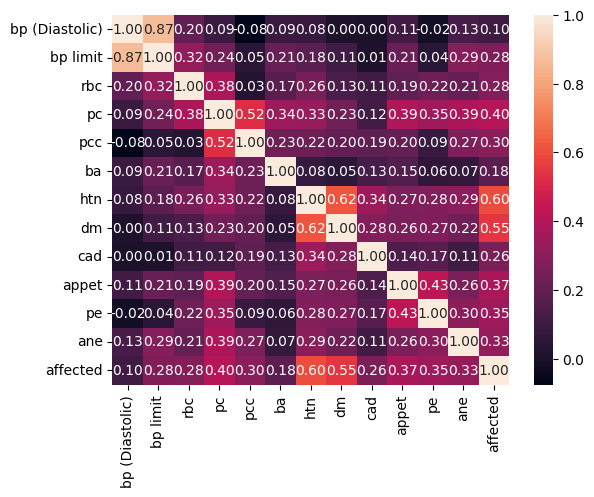

In [23]:
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f')
plt.show()